In [143]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
# add more ...
import seaborn as sns
import scipy as sci

In [3]:
# load data - slow
# data is from 2003/1/1 -2017/12/31
dataset = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [4]:
# for experimenting, delete later
print(dataset.columns)
small_data = dataset.head(5)
small_data

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,"(37.7196874952717, -122.476327815126)",11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,"(37.7812707434494, -122.411339562557)",9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,"(37.7626702770872, -122.435187699349)",13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,"(37.7649178909424, -122.421886357981)",8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,"(37.7516932889916, -122.413935404044)",7053577015200


In [5]:
# find all Tenderloin data
def data_filter(raw_data, cond):
    # returns all the entries that satisfy COND, as a new data frame.
    output = raw_data
    clean = output.where(cond).dropna()
    return clean
tenderloin_data = data_filter(dataset, dataset['PdDistrict'] == 'TENDERLOIN')
# correct the date
tenderloin_data['Date'] = pd.to_datetime(tenderloin_data.Date)

In [6]:
# sort by date
tenderloin_data.sort_values('Date', inplace = True);

**1. Group by values and plot bar chart of incidents**

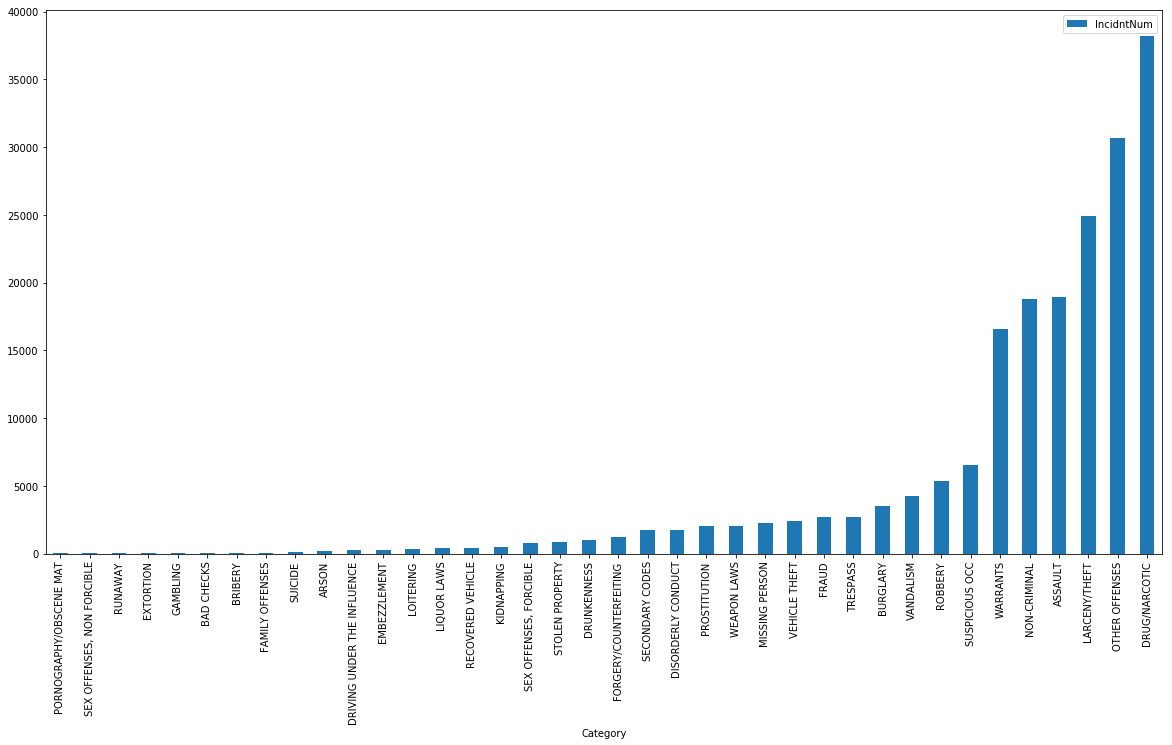

In [50]:
categories = tenderloin_data.groupby(['Category'])
count_incidents = categories.count()[['IncidntNum']]
count_incidents['Category'] = count_incidents.index
count_incidents.sort_values(["IncidntNum"], inplace=True, ascending=True)
# plot bar chart
categories = count_incidents['Category']
count_incidents.plot(x='Category',y='IncidntNum',kind='bar',figsize=(20,10));

**2. Computing crime rates**

In [42]:
dataset.sort_values(['Date'], inplace=True)
dataset_by_categories = dataset.groupby(['Category']).count()[['IncidntNum']].rename({'IncidntNum':'Incident Count'}, axis='columns')

In [48]:
dataset_by_categories.sort_values(['Incident Count'])
dataset_by_categories['Category'] = dataset_by_categories.index
total_incidents = np.sum(dataset_by_categories['Incident Count'])
crime_rates = (100 * dataset_by_categories['Incident Count'] / total_incidents).round(3).astype(str) + '%'
dataset_by_categories['Rate'] = crime_rates
dataset_by_categories.sort_values(['Incident Count'], ascending=False, inplace=True)
dataset_by_categories

,Incident Count,Category,Rate
Category,,,
LARCENY/THEFT,480448,LARCENY/THEFT,21.69%
OTHER OFFENSES,309358,OTHER OFFENSES,13.966%
NON-CRIMINAL,238323,NON-CRIMINAL,10.759%
ASSAULT,194694,ASSAULT,8.79%
VEHICLE THEFT,126602,VEHICLE THEFT,5.716%
DRUG/NARCOTIC,119628,DRUG/NARCOTIC,5.401%
VANDALISM,116059,VANDALISM,5.24%
WARRANTS,101379,WARRANTS,4.577%
BURGLARY,91543,BURGLARY,4.133%


**3. Generate scatter plot**

After some exploratory data analysis, we begin building a map with all incidents scattered.

In [109]:
# takes care of the matching part, want to find only dates xx/xx/2017
import re
from math import *
date_2017 = re.compile(r"[\d]{1,2}/[\d]{1,2}/2017")
check_match = lambda string: date_2017.fullmatch(string) is not None
def take_data_from_year(cond, data):
    # want to subset the data according to cond, applied on 'Date' attribute
    keep = list(map(cond, data['Date']))
    return data[keep]
data_2017 = take_data_from_year(check_match, dataset)

In [128]:
# get and append points for easy use
all_points = get_points(data_2017)

In [140]:
# get the X, Y, Categories
X = series_to_np(data_2017['X'])
Y = series_to_np(data_2017['Y'])
cats = series_to_np(data_2017['Category'])